<a href="https://colab.research.google.com/github/ArhanWR/Machine_Learning/blob/main/UTS_Clustering_Image_Segmentation_Soal_dan_Jawaban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS
**Nama Kelompok**
1. Alfan Farchi Al-Hadi (07 / 2141720084)
**2. Arhan Windu Rizki Putra Budianto (10 / 2141720227)**
3. Kurniawati Agustina (15 / 2141720040)
4. Rizky Anggata Putra Sasongko (25 / 2141720223)
5. Tarista Dwi Silvia (27 / 2141720014)

# Segmentasi Gambar dengan Clustering

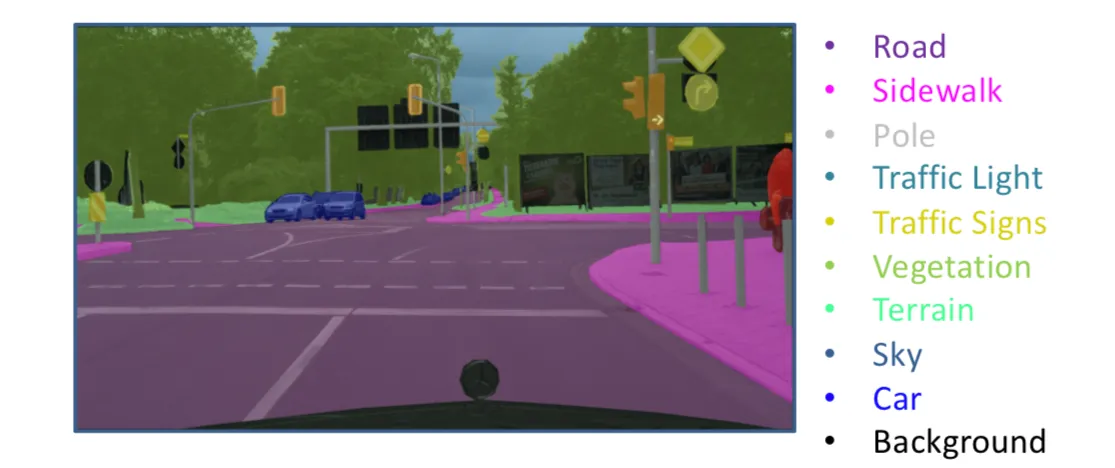

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

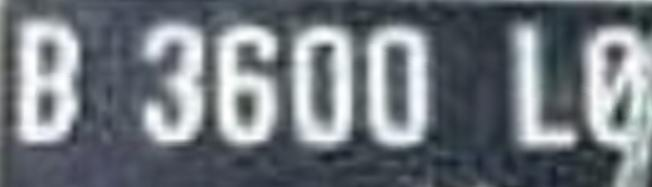

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

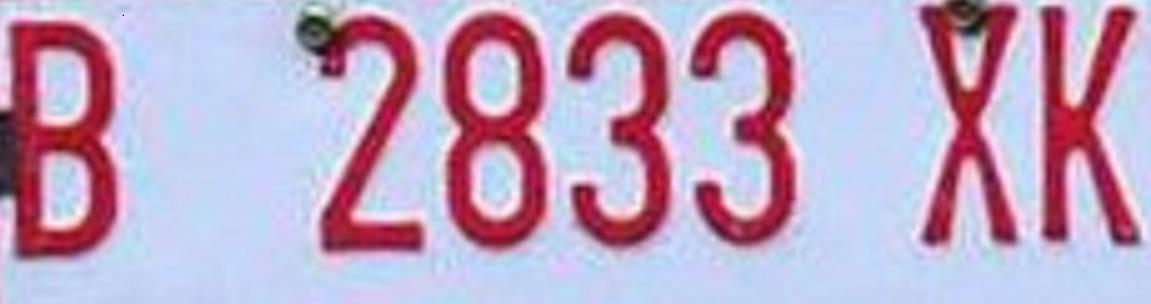

In [ ]:
# Load Gambar
img = cv2.imread('2.jpeg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

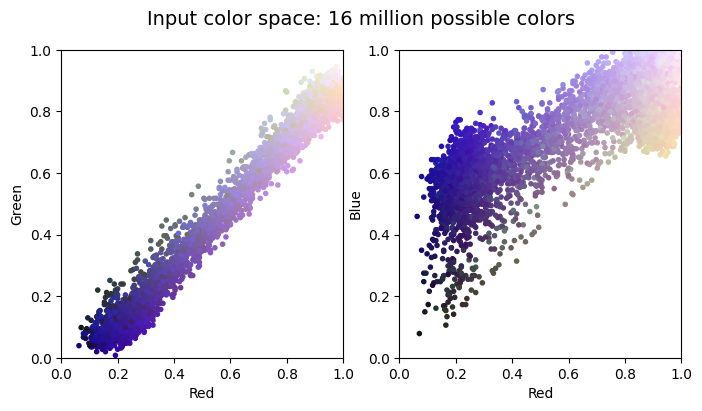

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

## Contoh Hasil Yang Diharapkan

Text(0.5, 1.0, '2-color Image')

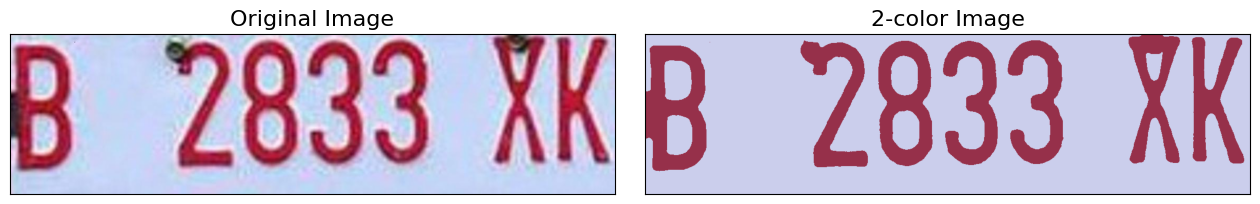

In [ ]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)

# Jawaban UTS
Untuk jawaban UTS ini saya menggunakan 2 jawaban dengan 1 kode jawaban seperti kode bantuan dan 1 kode jawaban dengan kode jawaban yang saya singkat agar output hanya menampilkan perbandingan citra sebelum dan sesudah diperjelas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


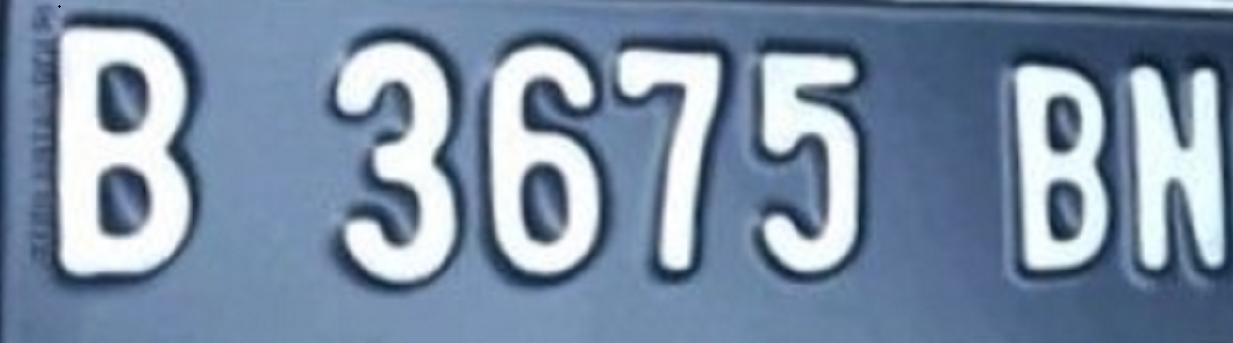

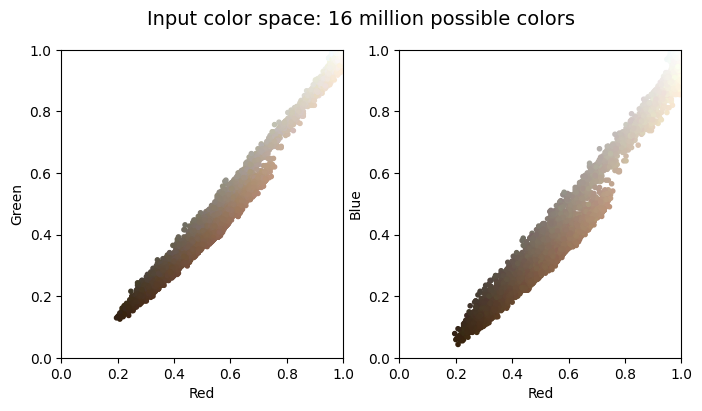

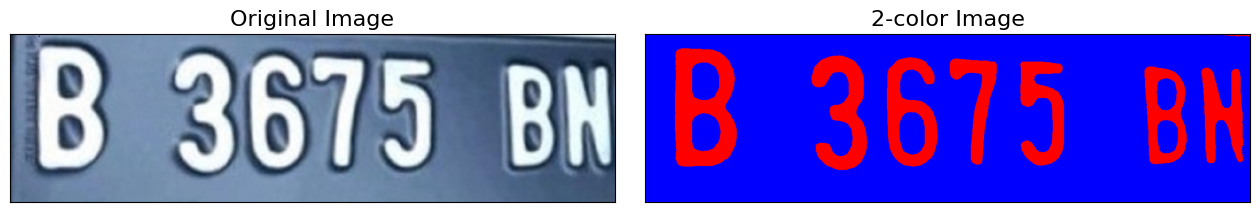

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Google Colab

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Mesin/plat.jpg')

# Tampilkan gambar
cv2_imshow(img)  # Use cv2_imshow to display the image in Google Colab

h, w, ch = img.shape

data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

# Ganti warna gambar
# Ganti latar belakang gambar menjadi merah (nilai merah tinggi, nilai biru dan hijau rendah)
# Ganti warna objek gambar menjadi biru (nilai biru tinggi, nilai merah dan hijau rendah)
new_colors = data.copy()
background_pixels = (new_colors[:, 0] > 0.8) & (new_colors[:, 1] > 0.8) & (new_colors[:, 2] > 0.8)
object_pixels = ~background_pixels
new_colors[background_pixels] = [1, 0, 0]
new_colors[object_pixels] = [0, 0, 1]

# Tampilkan gambar yang diubah warnanya
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


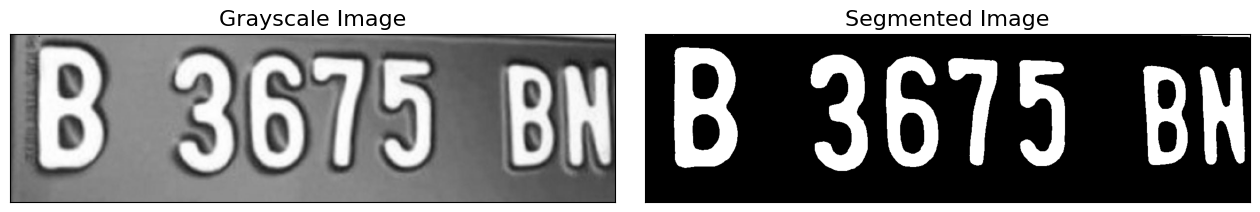

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Mesin/plat.jpg')
h, w, _ = img.shape

# Pra Pengolahan: Ubah color space ke Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Pra Pengolahan: Reduksi Dimensi dengan PCA
data = gray_img / 255.0
data = data.reshape(h * w, 1)

# Segmentasi dengan K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(h, w)

# Tampilkan perbandingan citra
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB), cmap='gray')
ax[0].set_title('Grayscale Image', size=16)
ax[1].imshow(segmented_img, cmap='gray')
ax[1].set_title('Segmented Image', size=16)

plt.show()

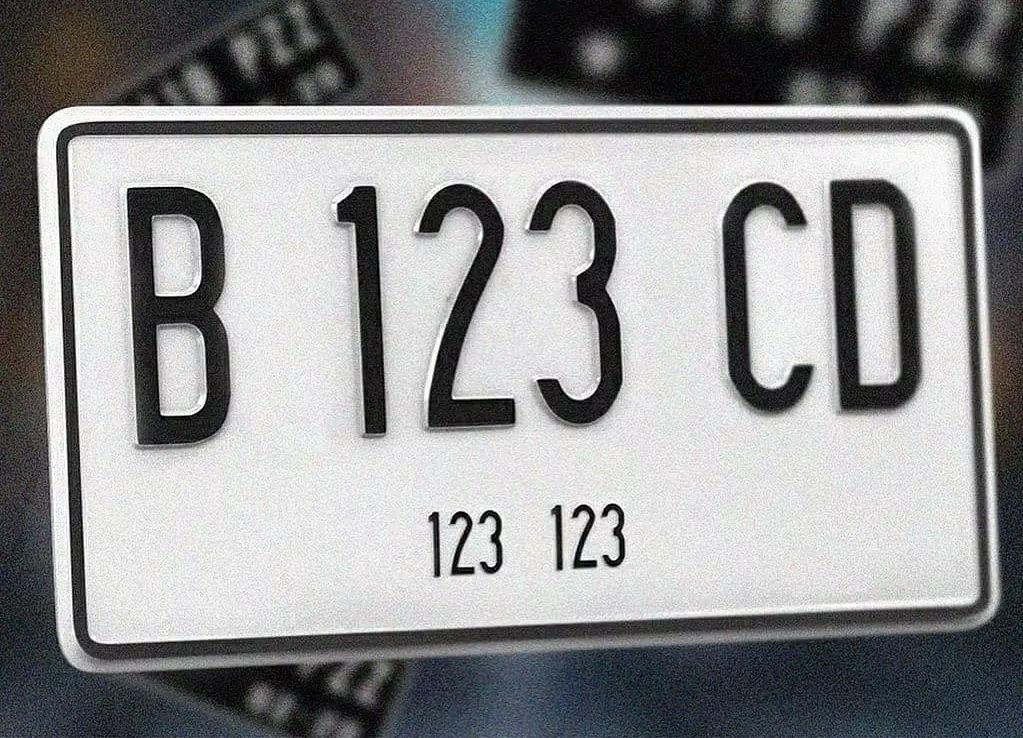

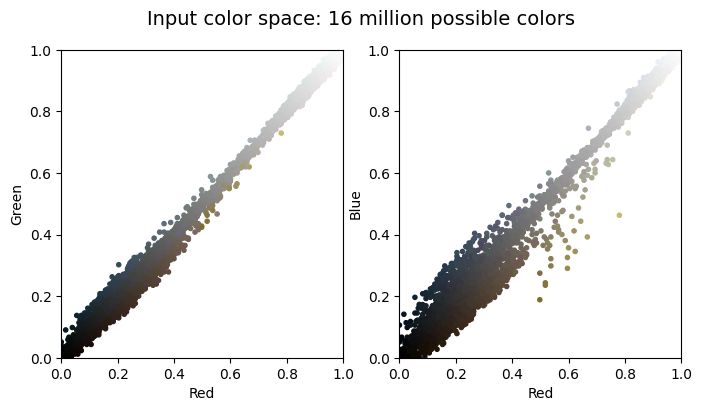

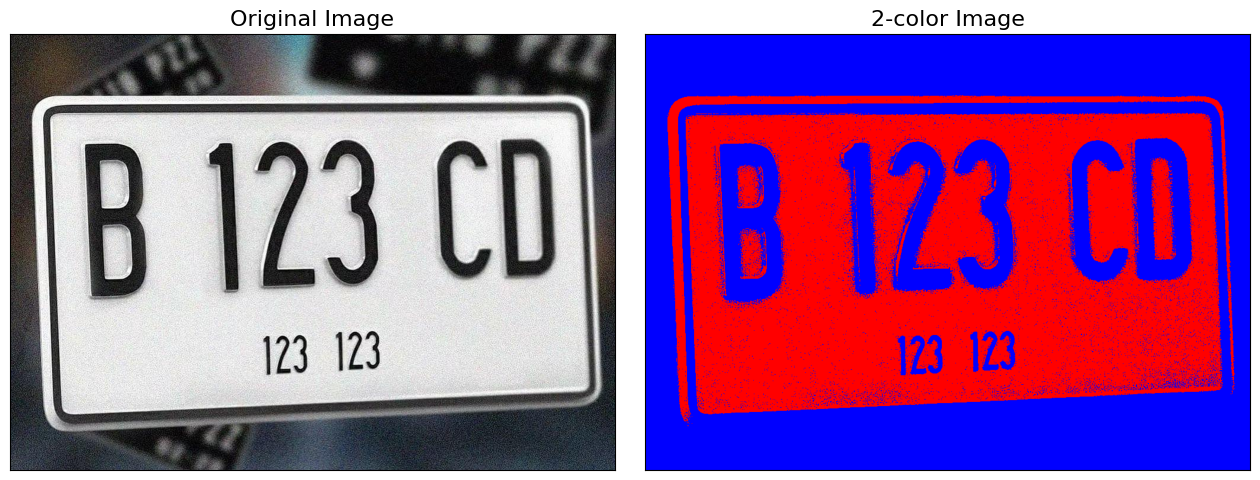

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Google Colab

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Mesin/plat2.jpg')

# Tampilkan gambar
cv2_imshow(img)  # Use cv2_imshow to display the image in Google Colab

h, w, ch = img.shape

data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

# Ganti warna gambar
# Ganti latar belakang gambar menjadi merah (nilai merah tinggi, nilai biru dan hijau rendah)
# Ganti warna objek gambar menjadi biru (nilai biru tinggi, nilai merah dan hijau rendah)
new_colors = data.copy()
background_pixels = (new_colors[:, 0] > 0.8) & (new_colors[:, 1] > 0.8) & (new_colors[:, 2] > 0.8)
object_pixels = ~background_pixels
new_colors[background_pixels] = [1, 0, 0]
new_colors[object_pixels] = [0, 0, 1]

# Tampilkan gambar yang diubah warnanya
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


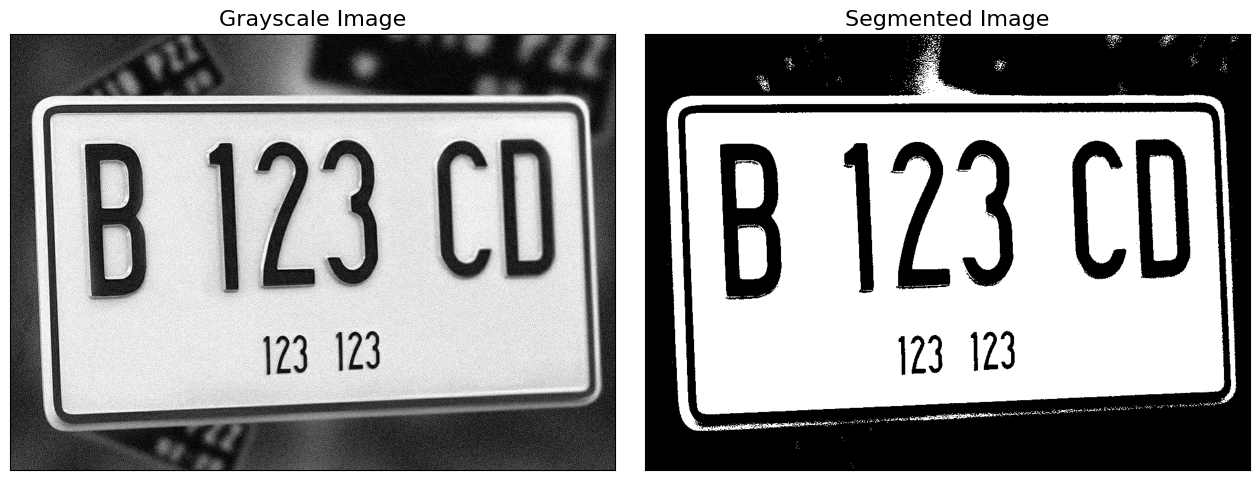

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Mesin/plat2.jpg')
h, w, _ = img.shape

# Pra Pengolahan: Ubah color space ke Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Pra Pengolahan: Reduksi Dimensi dengan PCA
data = gray_img / 255.0
data = data.reshape(h * w, 1)

# Segmentasi dengan K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(h, w)

# Tampilkan perbandingan citra
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB), cmap='gray')
ax[0].set_title('Grayscale Image', size=16)
ax[1].imshow(segmented_img, cmap='gray')
ax[1].set_title('Segmented Image', size=16)

plt.show()

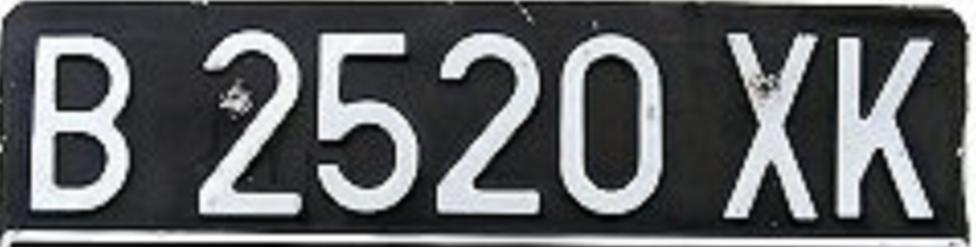

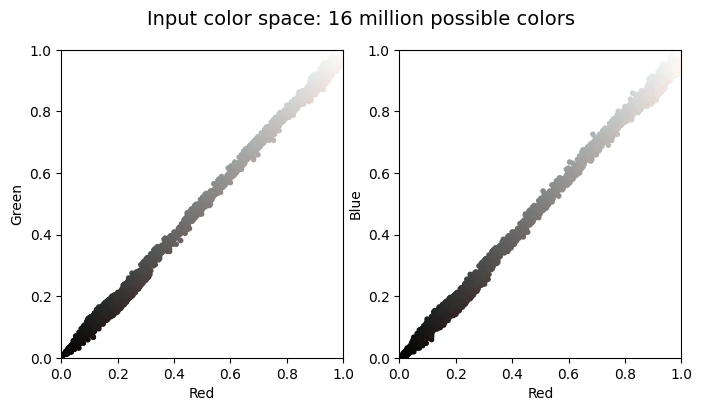

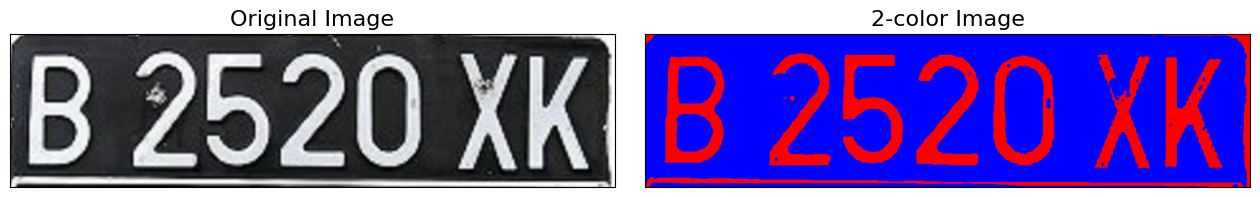

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Google Colab

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Mesin/plat3.jpg')

# Tampilkan gambar
cv2_imshow(img)  # Use cv2_imshow to display the image in Google Colab

h, w, ch = img.shape

data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

# Ganti warna gambar
# Ganti latar belakang gambar menjadi merah (nilai merah tinggi, nilai biru dan hijau rendah)
# Ganti warna objek gambar menjadi biru (nilai biru tinggi, nilai merah dan hijau rendah)
new_colors = data.copy()
background_pixels = (new_colors[:, 0] > 0.8) & (new_colors[:, 1] > 0.8) & (new_colors[:, 2] > 0.8)
object_pixels = ~background_pixels
new_colors[background_pixels] = [1, 0, 0]
new_colors[object_pixels] = [0, 0, 1]

# Tampilkan gambar yang diubah warnanya
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


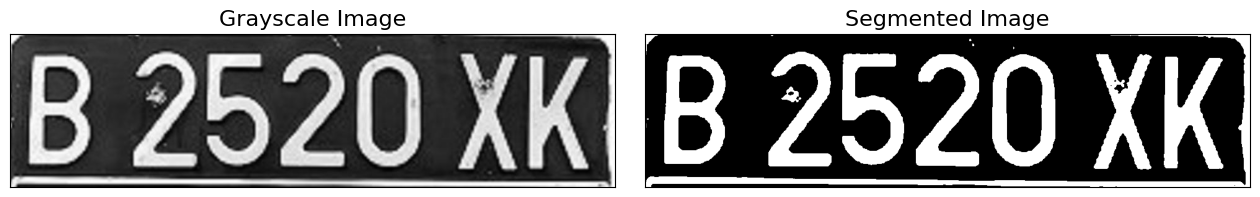

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Mesin/plat3.jpg')
h, w, _ = img.shape

# Pra Pengolahan: Ubah color space ke Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Pra Pengolahan: Reduksi Dimensi dengan PCA
data = gray_img / 255.0
data = data.reshape(h * w, 1)

# Segmentasi dengan K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(h, w)

# Tampilkan perbandingan citra
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB), cmap='gray')
ax[0].set_title('Grayscale Image', size=16)
ax[1].imshow(segmented_img, cmap='gray')
ax[1].set_title('Segmented Image', size=16)

plt.show()

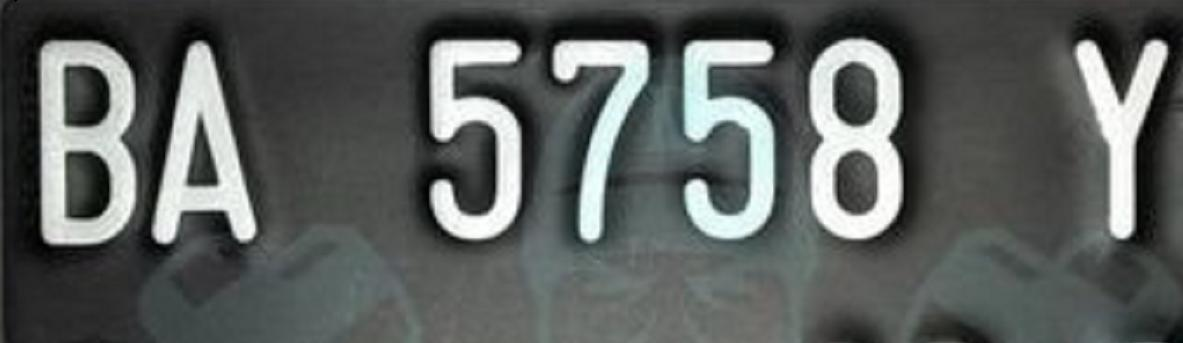

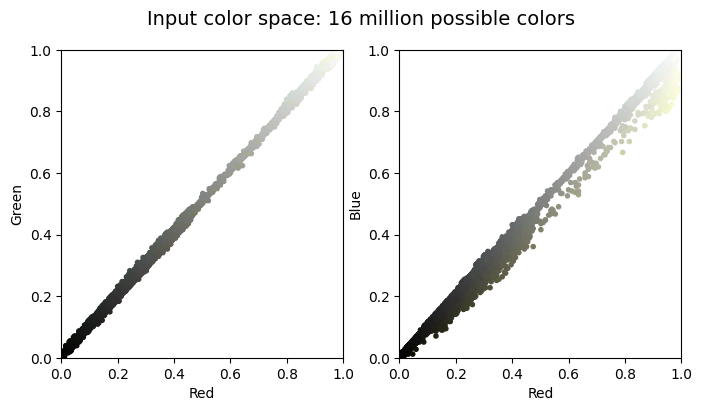

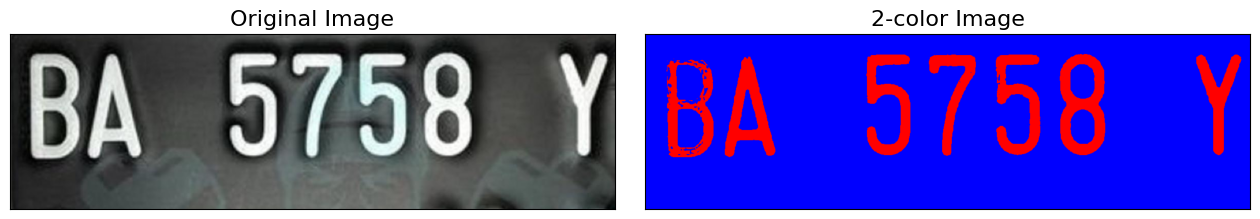

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Google Colab

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Mesin/plat4.jpg')

# Tampilkan gambar
cv2_imshow(img)  # Use cv2_imshow to display the image in Google Colab

h, w, ch = img.shape

data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

# Ganti warna gambar
# Ganti latar belakang gambar menjadi merah (nilai merah tinggi, nilai biru dan hijau rendah)
# Ganti warna objek gambar menjadi biru (nilai biru tinggi, nilai merah dan hijau rendah)
new_colors = data.copy()
background_pixels = (new_colors[:, 0] > 0.8) & (new_colors[:, 1] > 0.8) & (new_colors[:, 2] > 0.8)
object_pixels = ~background_pixels
new_colors[background_pixels] = [1, 0, 0]
new_colors[object_pixels] = [0, 0, 1]

# Tampilkan gambar yang diubah warnanya
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


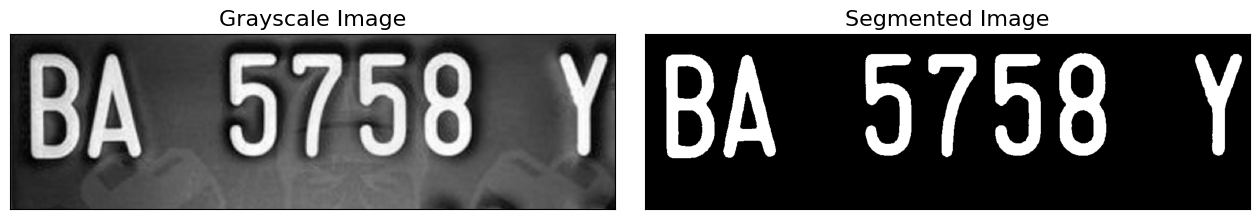

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Mesin/plat4.jpg')
h, w, _ = img.shape

# Pra Pengolahan: Ubah color space ke Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Pra Pengolahan: Reduksi Dimensi dengan PCA
data = gray_img / 255.0
data = data.reshape(h * w, 1)

# Segmentasi dengan K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(h, w)

# Tampilkan perbandingan citra
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB), cmap='gray')
ax[0].set_title('Grayscale Image', size=16)
ax[1].imshow(segmented_img, cmap='gray')
ax[1].set_title('Segmented Image', size=16)

plt.show()

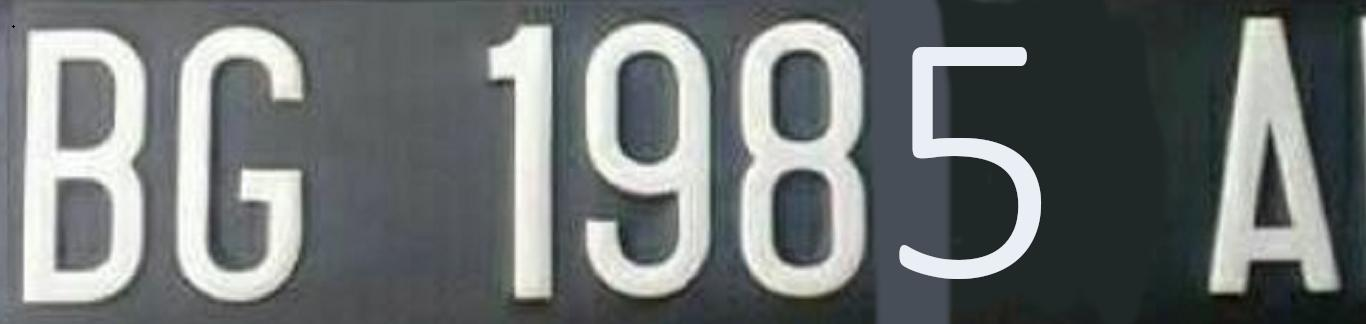

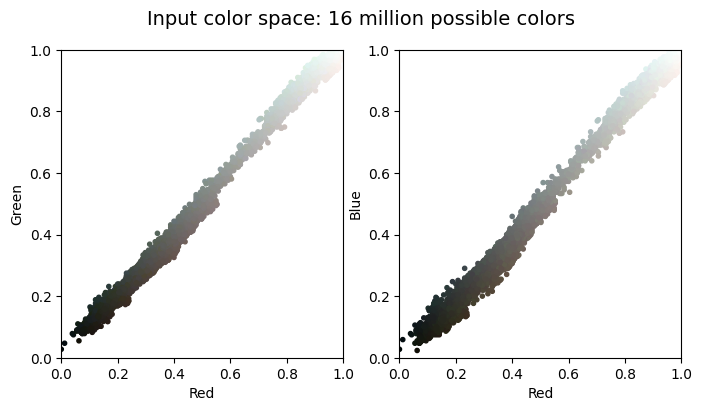

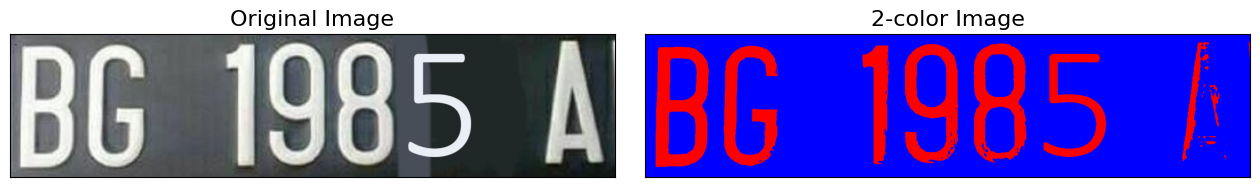

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Google Colab

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Mesin/plat5.jpg')

# Tampilkan gambar
cv2_imshow(img)  # Use cv2_imshow to display the image in Google Colab

h, w, ch = img.shape

data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: 16 million possible colors')

# Ganti warna gambar
# Ganti latar belakang gambar menjadi merah (nilai merah tinggi, nilai biru dan hijau rendah)
# Ganti warna objek gambar menjadi biru (nilai biru tinggi, nilai merah dan hijau rendah)
new_colors = data.copy()
background_pixels = (new_colors[:, 0] > 0.8) & (new_colors[:, 1] > 0.8) & (new_colors[:, 2] > 0.8)
object_pixels = ~background_pixels
new_colors[background_pixels] = [1, 0, 0]
new_colors[object_pixels] = [0, 0, 1]

# Tampilkan gambar yang diubah warnanya
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


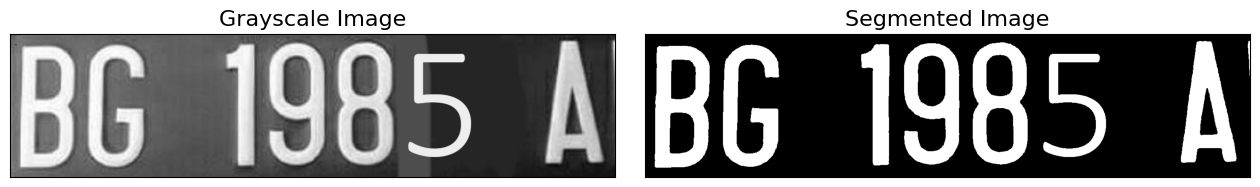

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Gambar
img = cv2.imread('/content/drive/MyDrive/Mesin/plat5.jpg')
h, w, _ = img.shape

# Pra Pengolahan: Ubah color space ke Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Pra Pengolahan: Reduksi Dimensi dengan PCA
data = gray_img / 255.0
data = data.reshape(h * w, 1)

# Segmentasi dengan K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(h, w)

# Tampilkan perbandingan citra
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB), cmap='gray')
ax[0].set_title('Grayscale Image', size=16)
ax[1].imshow(segmented_img, cmap='gray')
ax[1].set_title('Segmented Image', size=16)

plt.show()

# Penjelasan Kode

## Kode Pertama (Kode dengan contoh Kode Bantuan)
**Import Library:**

```
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
```

import numpy as np: Ini mengimpor library NumPy dengan alias np. NumPy digunakan untuk melakukan operasi matematika pada array numerik.

import cv2: Ini mengimpor library OpenCV, yang digunakan untuk membaca, memproses, dan memanipulasi gambar.

import matplotlib.pyplot as plt: Ini mengimpor library Matplotlib untuk membuat plot dan visualisasi gambar.

from google.colab.patches import cv2_imshow: Ini mengimpor fungsi cv2_imshow dari library Colab untuk menampilkan gambar di lingkungan Google Colab.

**Load Gambar:**
```
img = cv2.imread('/content/drive/MyDrive/Mesin/plat.jpg')
```

Di sini, membaca gambar dari file yang berlokasi di /content/drive/MyDrive/Mesin/plat.jpg dan menyimpannya dalam variabel img. Dapat diganti dengan gambar dari file yang ingin di gunakan.

**Tampilkan Gambar:**
```
cv2_imshow(img)
```

Menggunakan cv2_imshow untuk menampilkan gambar tersebut. Ini penting saat bekerja di lingkungan Google Colab.

**Ukuran Gambar:**
```
h, w, ch = img.shape
```

Dalam baris ini, mendapatkan tinggi (h), lebar (w), dan jumlah saluran warna (ch) dari gambar.

**Normalisasi Data:**
```
data = img / 255.0
```

Di sini, normalisasi gambar dengan membagi setiap nilai piksel oleh 255.0. Tujuan dari normalisasi adalah untuk mengubah nilai piksel dari rentang 0 hingga 255 menjadi rentang 0 hingga 1.

**Reshaping Data:**
```
data = data.reshape(h * w, ch)
```

Mengubah bentuk data gambar dari matriks 3D menjadi matriks 2D, di mana setiap baris mewakili satu piksel, dan setiap kolom mewakili saluran warna (R, G, B). Hasilnya adalah matriks data dengan bentuk (jumlah piksel, jumlah saluran warna).

**Fungsi plot_pixels:**
```
def plot_pixels(data, title, colors=None, N=10000):
```

Ini adalah definisi fungsi yang digunakan untuk melakukan plotting piksel dari gambar. Fungsi ini dapat mengambil beberapa argumen seperti data gambar, judul plot, dan argumen opsional lainnya.

**Pemrosesan Warna:**

```
new_colors = data.copy()
```

Di sini, membuat salinan data gambar ke variabel new_colors untuk menghindari mengubah data asli.

```
background_pixels = (new_colors[:, 0] > 0.8) & (new_colors[:, 1] > 0.8) & (new_colors[:, 2] > 0.8)
object_pixels = ~background_pixels
```

Melakukan pemrosesan warna dengan mengidentifikasi piksel latar belakang dan piksel objek dalam gambar. Piksel latar belakang diidentifikasi jika nilai merah, hijau, dan birunya semuanya lebih besar dari 0.8. Piksel objek adalah kebalikan dari piksel latar belakang.
```
new_colors[background_pixels] = [1, 0, 0]
new_colors[object_pixels] = [0, 0, 1]
```

Mengubah warna piksel latar belakang menjadi merah ([1, 0, 0]) dan warna piksel objek menjadi biru ([0, 0, 1]) dalam variabel new_colors.

**Tampilkan Gambar Hasil:**
```
img_recolored = new_colors.reshape(img.shape)
```
Mengembalikan new_colors ke bentuk aslinya (3D) dan menyimpannya dalam variabel img_recolored. Ini adalah gambar hasil pemrosesan warna.
```
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)
plt.show()
```
Membuat plot gambar asli dan gambar yang telah diubah warnanya menggunakan Matplotlib. Plot ini memungkinkan untuk membandingkan gambar sebelum dan sesudah pemrosesan warna.

Dengan demikian, kode ini membaca, memproses, dan menampilkan gambar, termasuk normalisasi, perubahan warna, dan perbandingan antara gambar asli dan gambar hasil pemrosesan.

## Kode Kedua dengan kode penjelasan yang saya gunakan
**Import Library:**

```
import cv2
import numpy as np
import matplotlib.pyplot as plt
```
Ini adalah baris pertama kode yang mengimpor library yang diperlukan untuk membaca, memproses, dan menampilkan gambar.

**Load Gambar:**
```
img = cv2.imread('/content/drive/MyDrive/Mesin/plat.jpg')
```
Membaca gambar dari file yang berlokasi di /content/drive/MyDrive/Mesin/plat.jpg (atau dapat juga gambar dari file yang diinginkan) menggunakan OpenCV dan menyimpannya dalam variabel img. Variabel ini berisi gambar dalam format OpenCV.
```
h, w, _ = img.shape
```
Mendapatkan tinggi (h) dan lebar (w) gambar menggunakan atribut .shape. Nilai ke-3 (yang diabaikan dengan _) adalah jumlah saluran warna, tetapi tidak digunakan dalam kode ini.

**Pra Pengolahan: Ubah Color Space ke Grayscale:**
```
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
```
Dalam langkah ini, mengonversi gambar warna menjadi gambar grayscale. Hasilnya adalah gray_img, yang hanya memiliki satu saluran warna (grayscale).

**Pra Pengolahan: Reduksi Dimensi dengan PCA:**
```
data = gray_img / 255.0
data = data.reshape(h * w, 1)
```
Mempersiapkan data untuk segmentasi dengan melakukan normalisasi pada gambar grayscale, kemudian mengubah bentuknya. Data gambar diubah dari matriks 2D menjadi vektor 1D.

**Segmentasi dengan K-Means:**
```
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
```
Mengimpor KMeans dari scikit-learn dan menginisialisasi model K-Means dengan dua klaster (n_clusters=2). Kemudian, melatih model K-Means dengan data gambar grayscale.
```
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(h, w)
```
Menggunakan model K-Means yang telah dilatih untuk mengklaster piksel di gambar grayscale. Hasilnya adalah segmented_img, yang berisi gambar hasil segmentasi.

**Tampilkan Perbandingan Citra:**
```
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
```
Membuat subplot dengan dua kolom untuk menampilkan dua gambar secara bersamaan.
```
fig.subplots_adjust(wspace=0.05)
```
Mengatur jarak antara kedua subplot agar sesuai.
```
ax[0].imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB), cmap='gray')
ax[0].set_title('Grayscale Image', size=16)
```
Menampilkan gambar grayscale pada subplot pertama dan memberi judul "Grayscale Image".
```
ax[1].imshow(segmented_img, cmap='gray')
ax[1].set_title('Segmented Image', size=16)
```
Menampilkan gambar hasil segmentasi pada subplot kedua dan memberi judul "Segmented Image".
```
plt.show()
```
Terakhir, menampilkan plot dengan menggunakan plt.show().

Dengan demikian, kode ini melakukan pra-pemrosesan pada gambar (konversi ke grayscale dan reduksi dimensi), mengelompokkan piksel gambar ke dalam dua kelompok dengan K-Means, dan menampilkan gambar asli serta hasil segmentasinya.